In [2]:
# import os
# os.system('conda install vtk')
# os.system('conda install mayavi')
# os.system('pip install wx')

In [3]:
import matplotlib;matplotlib.use('WX')

In [2]:
# # Import the other necessary libraries
import scipy.io;
import numpy as np;
from matplotlib import cm;
import ctmr_brain_plot;
from mayavi import mlab;
# #mlab.init_notebook()

In [4]:
subj = 'EC105';
subj_dir = '/Applications/freesurfer/subjects';
hem = 'rh';

# Now load the electrodes and pial surfaces to do more clever things with ctmr_brain_plot
a = scipy.io.loadmat('%s/%s/Meshes/rh_pial_trivert.mat'%(subj_dir, subj));
e = scipy.io.loadmat('%s/%s/TDT_elecs_all.mat'%(subj_dir, subj));

In [21]:
%pdb
reload(ctmr_brain_plot)
mesh, mlab = ctmr_brain_plot.ctmr_gauss_plot(a['tri'], a['vert'], elecs=e['elecmatrix'],weights=np.ones((e['elecmatrix'].shape[0],)),color=(0.8, 0.8, 0.8));
# Add the electrodes in STG in red
# num_elecs = e['elecmatrix'].shape[0]
# colors = np.zeros((num_elecs,3))
# for i in range(num_elecs):
#     colors[i,0] = np.random.uniform(0,1)
# print type(colors)
#pts, mlab = ctmr_brain_plot.el_add(e['elecmatrix'], color=colors)
#pts, mlab = ctmr_brain_plot.el_add(e['elecmatrix'][e['anatomy'][:,3]=='superiortemporal',:], color=(1., 0., 0.))

Automatic pdb calling has been turned OFF
[  3.51196227e-96   7.14666533e-97   6.84335855e-98 ...,   2.71703793e-05
   3.73891902e-04   1.27660818e-05]


In [22]:
mlab.show()

In [12]:
mlab.close()

In [19]:
mesh.actor.property.opacity = 0.5 # Make brain semi-transparent
pts.actor.property.specular_power = 0 # Make electrodes flat (not shiny)

# View from the side
mlab.view(azimuth=0, elevation=90)

(0.0,
 90.0,
 309.11427307128906,
 array([ 31.03894424,   1.20117569,  29.95195961]))

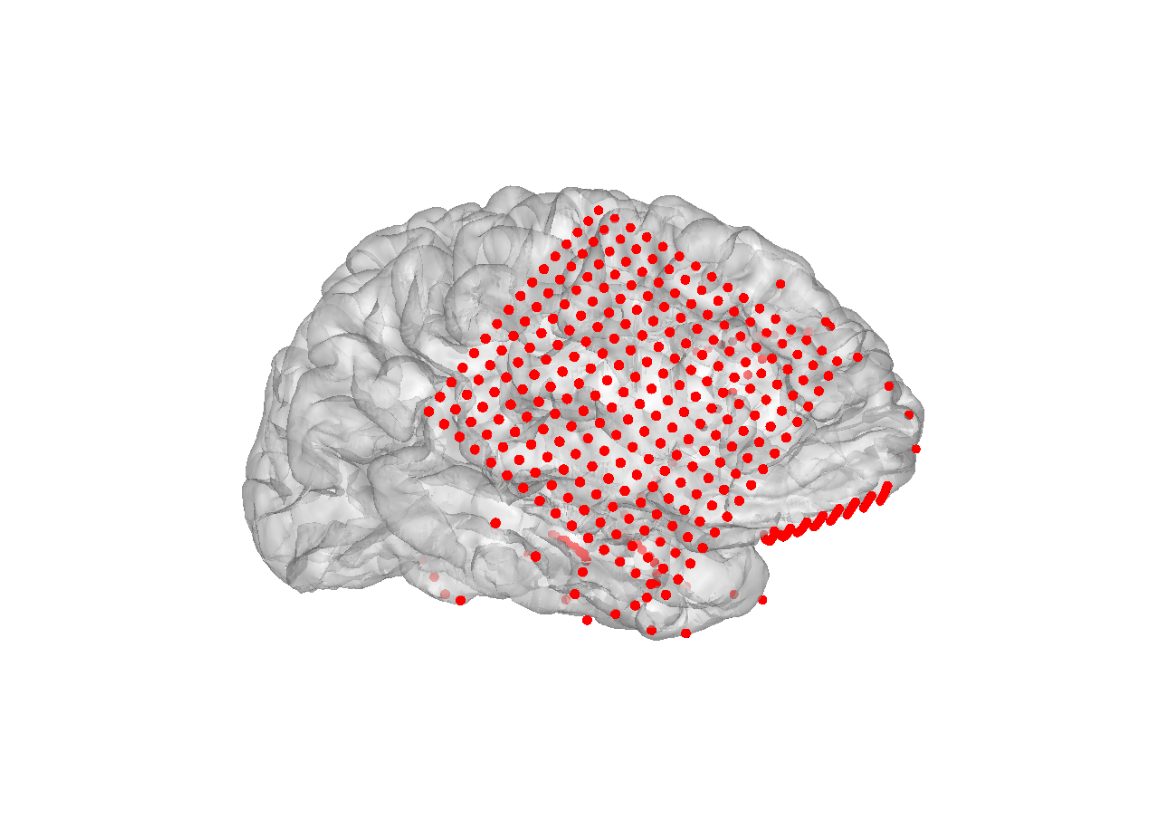

In [20]:
# Take a screenshot and show in the notebook

arr = mlab.screenshot(antialiased=True)

%matplotlib inline
import pylab as pl
pl.figure(figsize=(20,10))
pl.imshow(arr, aspect='equal')
pl.axis('off')
pl.show()

In [16]:
# Now use the gaussian method
mesh, mlab = ctmr_brain_plot.ctmr_gauss_plot(a['tri'],a['vert'],
                                elecs=e['elecmatrix'],
                                weights=np.ones((e['elecmatrix'].shape[0],1)),
                                cmap='RdBu')

[  3.51196227e-96   7.14666533e-97   6.84335855e-98 ...,   2.71703793e-05
   3.73891902e-04   1.27660818e-05]


In [17]:
# View from the right and save a screenshot
mlab.view(azimuth=0, elevation=90, distance=200, focalpoint=None, roll=None, reset_roll=True, figure=None)
mlab.savefig('test.tiff', size=(1200,900), magnification='auto')

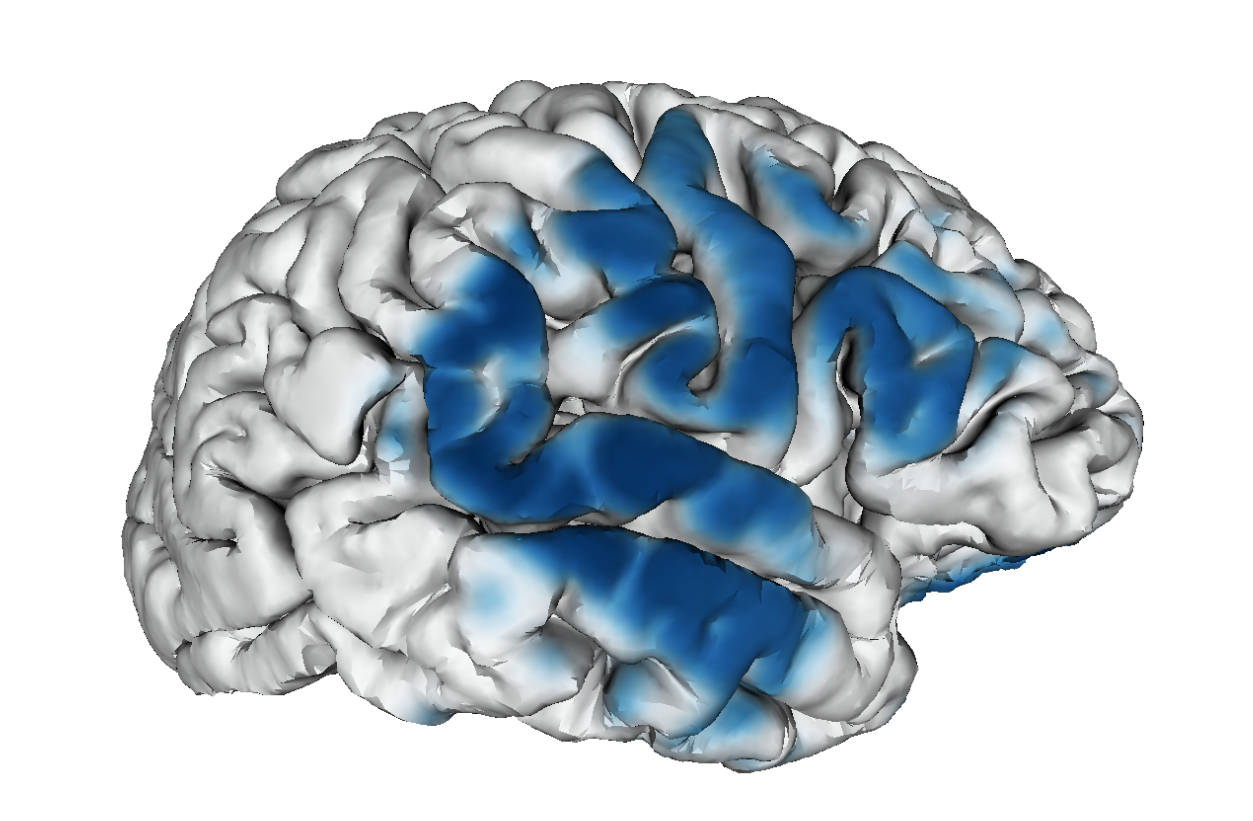

In [18]:
# Take a screenshot and show in the notebook

arr = mlab.screenshot(antialiased=True)

%matplotlib inline
import pylab as pl
pl.figure(figsize=(20,10))
pl.imshow(arr, aspect='equal')
pl.axis('off')
pl.show()

In [1]:
#plot_recon_anatomy.py
#
# Liberty Hamilton 2016
#

import mayavi
import scipy.io
import ctmr_brain_plot
import FS_colorLUT
import numpy as np

def plot_recon_anatomy(patient):
	subj = patient.subj
	hem = patient.hem
	fs_dir = patient.subj_dir
	a = scipy.io.loadmat('%s/%s/Meshes/%s_pial_trivert.mat'%(fs_dir, subj, hem))
	e = scipy.io.loadmat('%s/%s/elecs/TDT_elecs_all.mat'%(fs_dir, subj))

	# Plot the pial surface
	mesh, mlab = ctmr_brain_plot.ctmr_gauss_plot(a['tri'], a['vert'], color=(0.8, 0.8, 0.8))
	
	# Add the electrodes, colored by anatomical region
	elec_colors = np.zeros((e['elecmatrix'].shape[0], e['elecmatrix'].shape[1]))

	# Import freesurfer color lookup table as a dictionary
	cmap = FS_colorLUT.get_lut()

	# Make a list of electrode numbers
	elec_numbers = np.arange(e['elecmatrix'].shape[0])+1

	# Find all the unique brain areas in this subject
	brain_areas = np.unique(e['anatomy'][:,3])

	# Loop through unique brain areas and plot the electrodes in each brain area
	for b in brain_areas:
	    # Add relevant extra information to the label if needed for the color LUT
	    if b != 'NaN':
		    this_label = b[0]
		    if b[0][0:3]!='ctx' and b[0][0:4] != 'Left' and b[0][0:5] != 'Right' and b[0][0:5] != 'Brain' and b[0] != 'Unknown':
		        this_label = 'ctx-%s-%s'%(hem, b[0])
		        print(this_label)
		   	
		    if this_label != '':
		        el_color = np.array(cmap[this_label])/255.
		        ctmr_brain_plot.el_add(np.atleast_2d(e['elecmatrix'][e['anatomy'][:,3]==b,:]), 
		        					   color=tuple(el_color), numbers=elec_numbers[e['anatomy'][:,3]==b])

	return mesh, mlab

[]
ctx-lh-caudalmiddlefrontal
ctx-lh-entorhinal
ctx-lh-fusiform
ctx-lh-inferiortemporal
ctx-lh-lateralorbitofrontal
ctx-lh-medialorbitofrontal
ctx-lh-middletemporal
ctx-lh-parahippocampal
ctx-lh-parsopercularis
ctx-lh-parsorbitalis
ctx-lh-parstriangularis
ctx-lh-postcentral
ctx-lh-precentral
ctx-lh-rostralmiddlefrontal
ctx-lh-superiortemporal
ctx-lh-supramarginal
ctx-lh-temporalpole


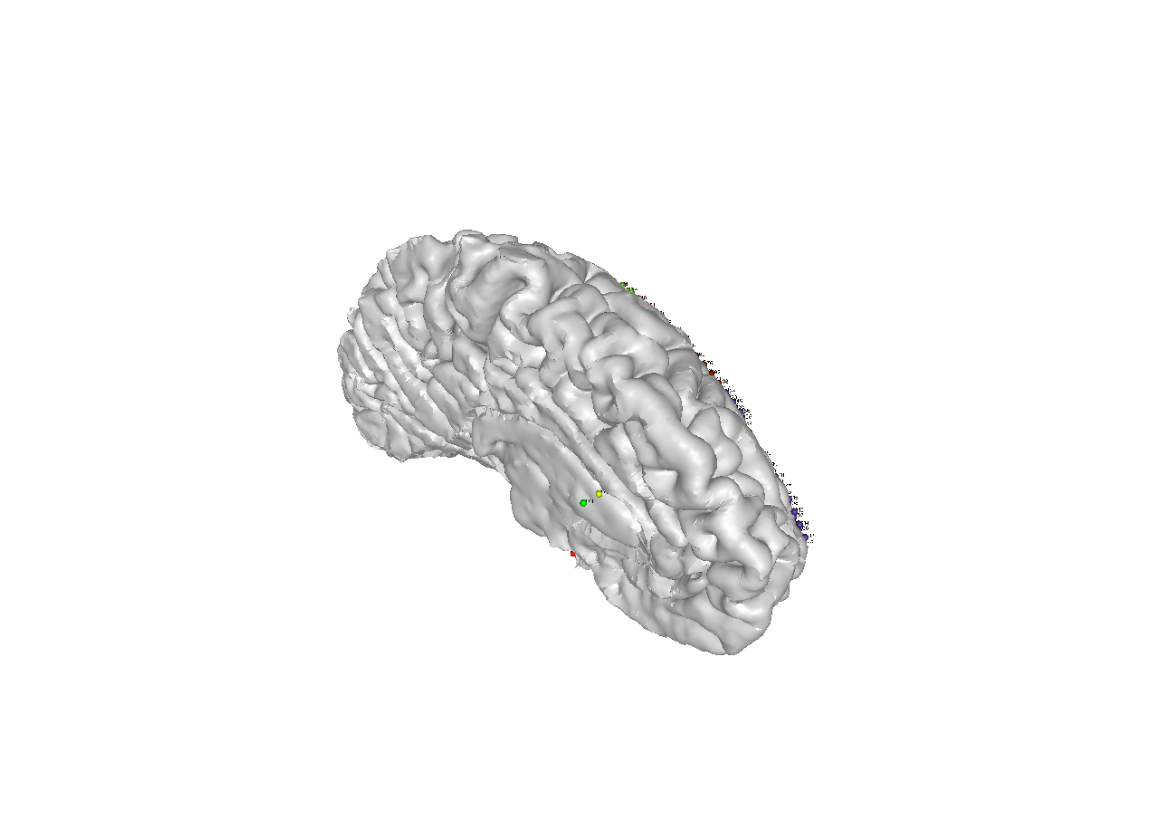

In [15]:
import img_pipe
patient = img_pipe.freeCoG('EC108','lh')
mesh,mlab = plot_recon_anatomy(patient)
arr = mlab.screenshot(antialiased=True)
mlab.view(azimuth=180, elevation=0)
%matplotlib inline
import pylab as pl
pl.figure(figsize=(20,10))
pl.imshow(arr, aspect='equal')
pl.axis('off')
pl.show()

In [9]:
mlab.show()

In [30]:
mlab.close()

Exception KeyboardInterrupt: KeyboardInterrupt() in <function remove at 0x124186a28> ignored
Exception KeyboardInterrupt: KeyboardInterrupt() in <function remove at 0x124186a28> ignored
Exception KeyboardInterrupt: KeyboardInterrupt() in <function remove at 0x124186a28> ignored
Exception KeyboardInterrupt: KeyboardInterrupt() in <function remove at 0x124186a28> ignored


AttributeError: 'NoneType' object has no attribute 'scene'

In [11]:
%matplotlib inline
import img_pipe
reload(img_pipe)
patient=img_pipe.freeCoG('EC105','rh')
mesh,mlab = patient.plot_recon_anatomy(alpha=1.0)

[]
ctx-rh-caudalmiddlefrontal
ctx-rh-entorhinal
ctx-rh-fusiform
ctx-rh-inferiorparietal
ctx-rh-inferiortemporal
ctx-rh-lateralorbitofrontal
ctx-rh-medialorbitofrontal
ctx-rh-middletemporal
ctx-rh-parahippocampal
ctx-rh-parsopercularis
ctx-rh-parsorbitalis
ctx-rh-parstriangularis
ctx-rh-postcentral
ctx-rh-precentral
ctx-rh-rostralmiddlefrontal
ctx-rh-superiortemporal
ctx-rh-supramarginal
ctx-rh-temporalpole


In [5]:
mlab.show()

[]


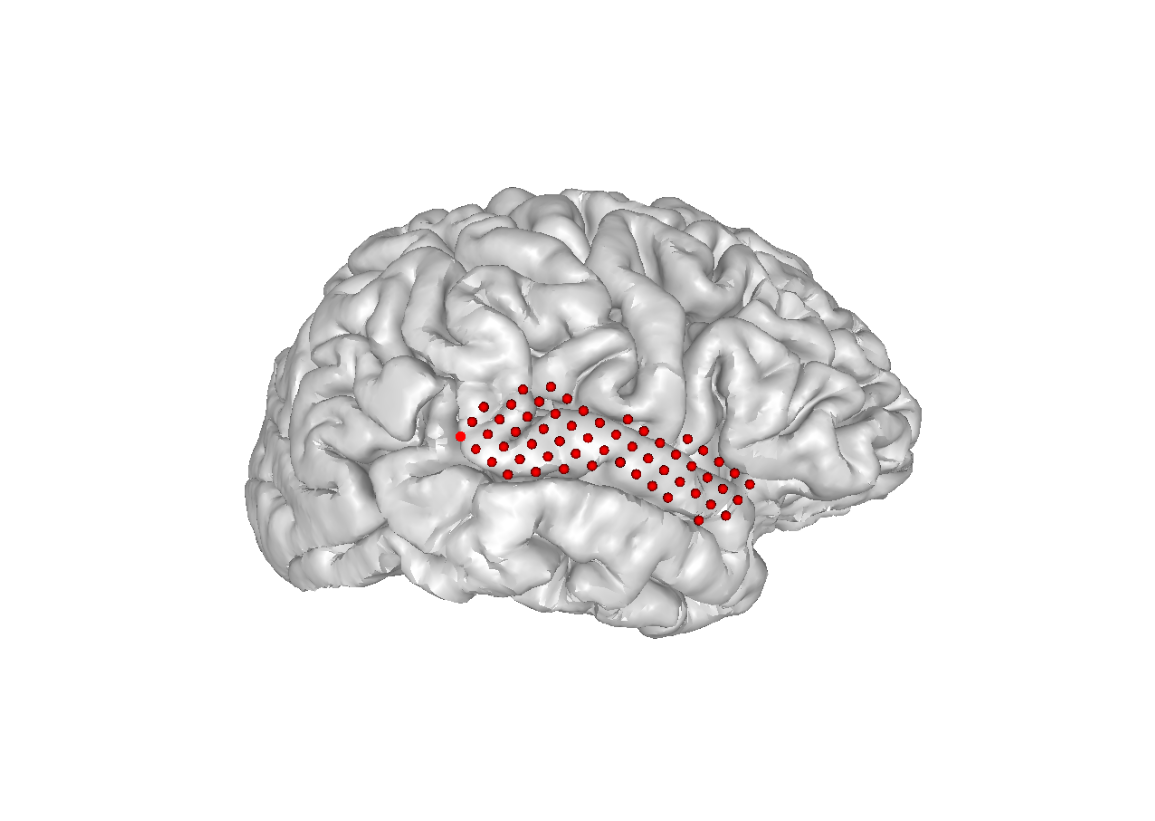

(<mayavi.modules.surface.Surface at 0x12c7a8110>,
 <module 'mayavi.mlab' from '/Users/dlchang/anaconda2/lib/python2.7/site-packages/mayavi/mlab.pyc'>)

In [64]:
import numpy as np
def get_elecs_anat(subj_dir,subj,region):
    tdt = scipy.io.loadmat('%s/%s/elecs/TDT_elecs_all.mat'%(subj_dir,subj))
    return tdt['elecmatrix'][np.where(tdt['anatomy'][:,3]==region)[0],:]

def ctmr_plot(subj_dir,subj,hem, elecs, weights=None,interactive=False,plot_elecs=False,plot_gaussian=True):
        #need ctmr_brain_plot, mayavi, vtk
        import ctmr_brain_plot
        from mayavi import mlab
        from matplotlib import cm
        import scipy.io
        import numpy as np
        import matplotlib.pyplot as plt
        
        a = scipy.io.loadmat('%s/%s/Meshes/%s_pial_trivert.mat'%(subj_dir, subj,hem));
        mesh, mlab = ctmr_brain_plot.ctmr_gauss_plot(a['tri'], a['vert'], elecs=elecs,weights=weights,color=(0.8, 0.8, 0.8))
       
        if weights is not None:
            colors = np.zeros((elecs.shape[0],3))
            colors[:,0] = weights
        else:
            colors = (1.,0.,0.)
        if plot_elecs:
            pts, mlab = ctmr_brain_plot.el_add(elecs, color=colors)

        mesh.actor.property.opacity = 1.0 # Make brain semi-transparent
        if plot_elecs:
            pts.actor.property.specular_power = 0 # Make electrodes flat (not shiny)

        # View from the side
        if hem=='lh':
            azimuth=180
        elif hem=='rh':
            azimuth=0
        mlab.view(azimuth, elevation=90)
        arr = mlab.screenshot(antialiased=True)
        plt.figure(figsize=(20,10))
        plt.imshow(arr, aspect='equal')
        plt.axis('off')
        plt.show()
        if interactive:
            mlab.show()
        else:
            mlab.close()
        return mesh,mlab

#testing
STG_elecs = get_elecs_anat('/Applications/freesurfer/subjects/','EC105','superiortemporal')
ctmr_plot('/Applications/freesurfer/subjects','EC105','rh',STG_elecs,plot_gaussian=False,plot_elecs=True,weights=np.ones((STG_elecs.shape[0],)))

[  0.00000000e+000   0.00000000e+000   0.00000000e+000 ...,
   6.18734035e-175   1.57691746e-172   2.92165740e-177]


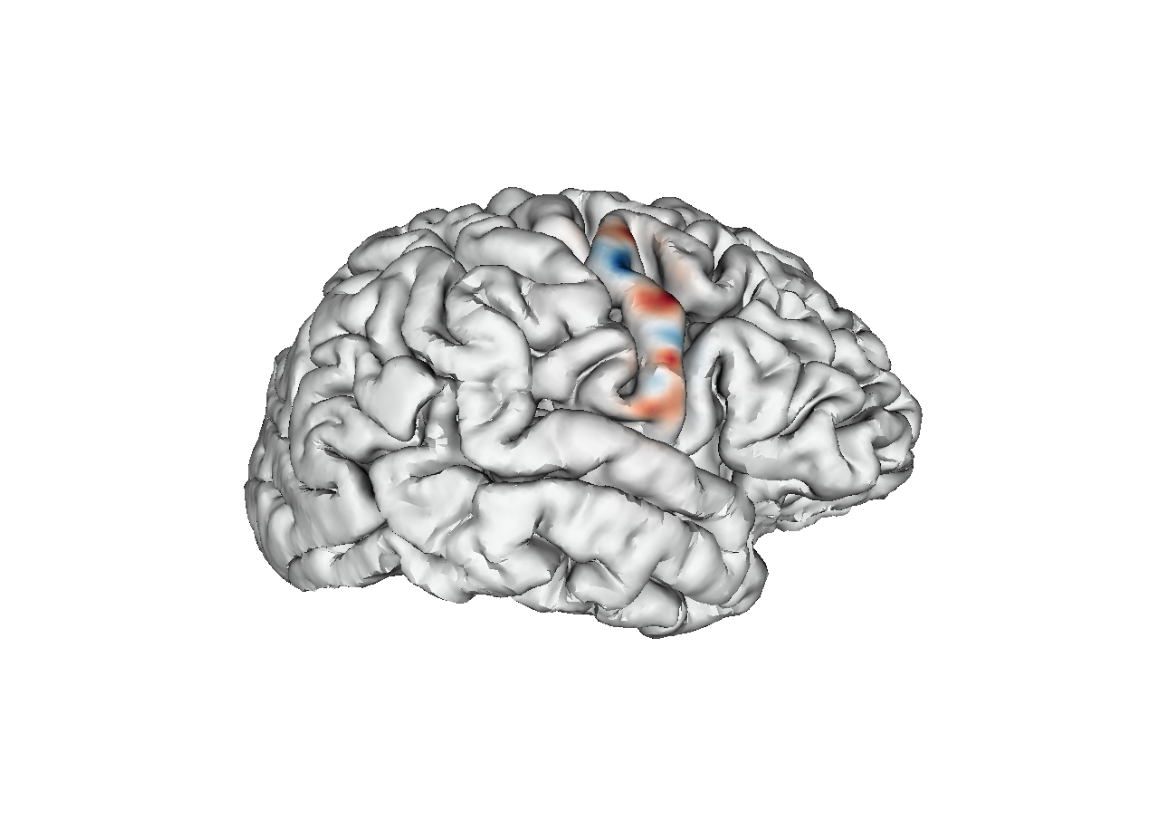

(<mayavi.modules.surface.Surface at 0x12a6b4710>,
 <module 'mayavi.mlab' from '/Users/dlchang/anaconda2/lib/python2.7/site-packages/mayavi/mlab.pyc'>)

In [85]:
import plot_brain
reload(plot_brain)
subj_dir = '/Applications/freesurfer/subjects/'
subj = 'EC105'
precentral_elecs = plot_brain.get_elecs_anat(subj_dir,subj,'precentral')
plot_brain.ctmr_plot(subj_dir,subj,'rh',precentral_elecs,np.random.randn(precentral_elecs.shape[0],))

In [82]:
mlab.close()